## Formação Cientista de dados
### Deep Learning

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn. metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

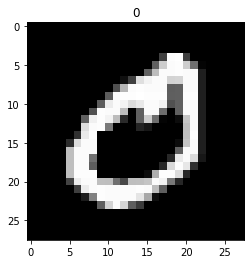

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [3]:
# Mudanã de dimensão, originalmente está em 28x28 e precisa está 784(vetor)
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [5]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento/= 255
X_teste /= 255

In [6]:
# Transformação para o formato dummy (10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
# Estrutura de rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
# Camada de saída, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [8]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historica temos os históricos das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                      validation_data=(X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4551 - accuracy: 0.8612 - val_loss: 0.1708 - val_accuracy: 0.9492
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2283 - accuracy: 0.9338 - val_loss: 0.1291 - val_accuracy: 0.9620
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1919 - accuracy: 0.9446 - val_loss: 0.1205 - val_accuracy: 0.9652
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1679 - accuracy: 0.9517 - val_loss: 0.1155 - val_accuracy: 0.9661
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1489 - accuracy: 0.9565 - val_loss: 0.1094 - val_accuracy: 0.9683
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1391 - accuracy: 0.9589 - val_loss: 0.0954 - val_accuracy: 0.9713
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1325 - accuracy: 0.9607 - val_loss: 0.0932 - val_accuracy:

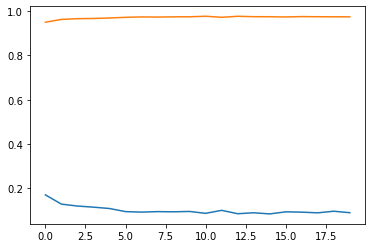

In [10]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
# Evolução do erro, azul
plt.plot(historico.history['val_loss'])
# Performance da rede
plt.plot(historico.history['val_accuracy'])

In [11]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
previsoes

array([[4.2664684e-14, 2.7152327e-08, 1.0465859e-08, ..., 9.9999750e-01,
        9.6276298e-10, 2.2222864e-06],
       [4.0966395e-08, 6.0565577e-05, 9.9970776e-01, ..., 2.5435464e-05,
        1.6695871e-08, 5.1701790e-12],
       [1.6559875e-12, 9.9998617e-01, 6.6907825e-07, ..., 7.9778056e-06,
        5.0243602e-06, 7.2446028e-11],
       ...,
       [1.3683477e-12, 4.5401523e-11, 5.3683991e-09, ..., 7.6813311e-09,
        5.4196656e-09, 1.8559746e-08],
       [1.4055375e-15, 3.4637454e-17, 1.0896498e-17, ..., 9.0132539e-15,
        3.3758571e-09, 1.2007321e-12],
       [3.6227962e-16, 1.7424928e-23, 2.5721328e-17, ..., 8.2023043e-24,
        8.8972688e-13, 2.7603534e-21]], dtype=float32)

In [12]:
# Valor máximo (com a prob. maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes] 
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    1,    1,    0,    0,    0,    3,    1,    2,    1],
       [   0, 1125,    3,    2,    0,    1,    2,    0,    2,    0],
       [   3,    3, 1000,    4,    7,    0,    4,    9,    2,    0],
       [   0,    0,    6,  970,    0,   22,    0,    5,    3,    4],
       [   1,    0,    3,    0,  960,    0,    7,    1,    1,    9],
       [   3,    0,    0,    2,    1,  872,   10,    2,    1,    1],
       [   3,    3,    0,    1,    4,    5,  941,    0,    1,    0],
       [   2,    5,    9,    1,    1,    0,    0, 1002,    2,    6],
       [   6,    1,    5,    5,    6,   10,    4,    4,  927,    6],
       [   3,    4,    0,    3,   14,    8,    1,    7,    2,  967]],
      dtype=int64)

In [13]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
# número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
# Passa a mesma posição para o modelo prever
novo = X_treinamento[20]
# de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
# previsão
pred = modelo.predict(novo)
# maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]